Question 6

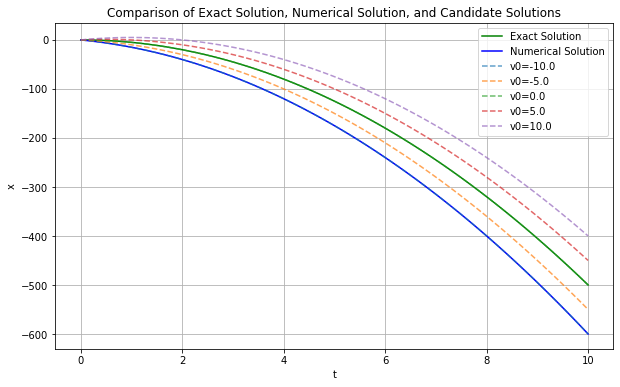

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of first-order ODEs
def system(t, y):
    return [y[1], -10]  # dx/dt = v, dv/dt = -10

# Define the boundary conditions
t0 = 0
t_end = 10
x0 = 0
x_end = 0

# Define the exact solution
def exact_solution(t):
    return -5 * t**2 + (x_end - x0) / t_end * t + x0

# Function to solve the ODE with a given initial velocity
def solve_ode(v0):
    sol = solve_ivp(system, [t0, t_end], [x0, v0], t_eval=np.linspace(t0, t_end, 100))
    return sol.y[0]

# Shooting method to find the correct initial velocity
def shooting_method(target_x_end):
    a = -10
    b = 10
    while b - a > 1e-6:
        v0 = (a + b) / 2
        x_values = solve_ode(v0)
        if x_values[-1] * target_x_end > 0:
            a = v0
        else:
            b = v0
    return (a + b) / 2

# Find the correct initial velocity using the shooting method
v0_solution = shooting_method(x_end)

# Solve the ODE using the correct initial velocity
sol = solve_ivp(system, [t0, t_end], [x0, v0_solution], t_eval=np.linspace(t0, t_end, 100))

# Plotting the solutions
plt.figure(figsize=(10, 6))

# Plot the exact solution
t_exact = np.linspace(t0, t_end, 100)
x_exact = exact_solution(t_exact)
plt.plot(t_exact, x_exact, label='Exact Solution', color='green')

# Plot the numerical solution
plt.plot(sol.t, sol.y[0], label='Numerical Solution', color='blue')

# Plot candidate solutions
v0_candidates = np.linspace(-10, 10, 5)
for v0 in v0_candidates:
    x_values = solve_ode(v0)
    plt.plot(np.linspace(t0, t_end, 100), x_values, linestyle='--', label=f'v0={v0}', alpha=0.7)

plt.xlabel('t')
plt.ylabel('x')
plt.title('Comparison of Exact Solution, Numerical Solution, and Candidate Solutions')
plt.legend()
plt.grid(True)
plt.show()